##Máquina de soporte vectorial para clasificación.
###Kernel lineal y usando dos covariables
####75% de datos de entrenamiento

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.utils import column_or_1d
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [6]:
data = pd.read_csv("df_data2.csv")
print(data.head())
print(data.describe())

              amount     bin status  fraud  BankFrequency  AmountCategory  \
0  amount below 2000  491283   paid      0            183               4   
1   amount below 500  455255   paid      0            194               1   
2  amount below 1500  407458   paid      0              6               3   
3   amount below 500  455511   paid      0             64               1   
4  amount below 1000  370782   paid      0             10               2   

   AmountMark  
0        1750  
1         250  
2        1250  
3         250  
4         750  
                 bin         fraud  BankFrequency  AmountCategory  \
count   11122.000000  11122.000000   11122.000000    11122.000000   
mean   487255.105107      0.154828     280.208236        2.220464   
std     54447.849867      0.361757     301.820646        1.777312   
min    370700.000000      0.000000       1.000000        1.000000   
25%    441028.000000      0.000000      53.000000        1.000000   
50%    491375.000000      0

In [7]:
data.head()

,amount,bin,status,fraud,BankFrequency,AmountCategory,AmountMark
0,amount below 2000,491283,paid,0,183,4,1750
1,amount below 500,455255,paid,0,194,1,250
2,amount below 1500,407458,paid,0,6,3,1250
3,amount below 500,455511,paid,0,64,1,250
4,amount below 1000,370782,paid,0,10,2,750


In [9]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(data[["AmountMark","BankFrequency"]],data[["fraud"]],train_size=0.75)
print len(X_train), len(X_test)

8341 2781


#### 2) Transformación de los datos

In [10]:
X_train1=np.asarray(X_train['AmountMark'])
X_train2=np.asarray(X_train['BankFrequency'])

In [11]:
Y_train2 = column_or_1d(Y_train)

#### 3) Se define el kernel para el SVM y se ajusta el modelo

In [12]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

####4) Valores de coeficientes y cálculo del umbral de hyperplano

In [13]:
w = clf.coef_[0]
w0 = (clf.intercept_[0])
soporte = -w[0] / w[1]
x = np.linspace(-1, 3)
umbral = x * soporte - w0 / w[1]
print(w0, w, soporte, umbral)

(-0.99999827269801922, array([ -9.31322575e-10,  -2.03726813e-09]), -0.45714285714285713, array([ -4.90852557e+08,  -4.90852557e+08,  -4.90852557e+08,
        -4.90852557e+08,  -4.90852557e+08,  -4.90852557e+08,
        -4.90852557e+08,  -4.90852557e+08,  -4.90852557e+08,
        -4.90852557e+08,  -4.90852557e+08,  -4.90852557e+08,
        -4.90852557e+08,  -4.90852557e+08,  -4.90852557e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852558e+08,  -4.90852558e+08,  -4.90852558e+08,
        -4.90852559e+08,  -4.90852559e+08,  -4.90852559e

In [14]:
clf.coef_[0]

array([ -9.31322575e-10,  -2.03726813e-09])

#### 5) Visualización de clasificación multidimensional con SVM kernel lineal

In [19]:
soporte_down = clf.support_vectors_[0]
umbral_down = soporte * x + (soporte_down[1] - soporte * soporte_down[0])
soporte_up = clf.support_vectors_[-1]
umbral_up = soporte * x + (soporte_up[1] - soporte * soporte_up[0])
print(x)
print(soporte_down)
print(soporte_up)
print(umbral_down)
print(umbral_up)

[-1.         -0.91836735 -0.83673469 -0.75510204 -0.67346939 -0.59183673
 -0.51020408 -0.42857143 -0.34693878 -0.26530612 -0.18367347 -0.10204082
 -0.02040816  0.06122449  0.14285714  0.2244898   0.30612245  0.3877551
  0.46938776  0.55102041  0.63265306  0.71428571  0.79591837  0.87755102
  0.95918367  1.04081633  1.12244898  1.20408163  1.28571429  1.36734694
  1.44897959  1.53061224  1.6122449   1.69387755  1.7755102   1.85714286
  1.93877551  2.02040816  2.10204082  2.18367347  2.26530612  2.34693878
  2.42857143  2.51020408  2.59183673  2.67346939  2.75510204  2.83673469
  2.91836735  3.        ]
[ 250.    3.]
[ 750.   33.]
[ 117.74285714  117.70553936  117.66822157  117.63090379  117.59358601
  117.55626822  117.51895044  117.48163265  117.44431487  117.40699708
  117.3696793   117.33236152  117.29504373  117.25772595  117.22040816
  117.18309038  117.14577259  117.10845481  117.07113703  117.03381924
  116.99650146  116.95918367  116.92186589  116.8845481   116.84723032
  116.80

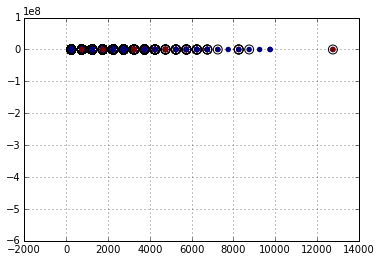

In [20]:
plt.plot(x, umbral, 'k-', color='orange')
plt.plot(x, umbral_down, 'k--', color='orange')
plt.plot(x, umbral_up, 'k--', color='orange')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X_train1,X_train2, c=Y_train2, edgecolors='none', s=30)
plt.grid()

####No es un modelo que clasifique bien